In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

MODEL_PATH = '/usr/local/google/home/bkinman/proj/AWAC_resetfree/data/ashvin/icml2020/hand/soft/clip-franka/run0/id0/bc_policy.pkl'
TRAINING_DATA_PATH = '/usr/local/google/home/bkinman/proj/rpl_reset_free/20201005_slider_play_reprocessed/bc_train.pkl'
policy = pickle.load(open(MODEL_PATH, 'rb'))
training_data = pickle.load(open(TRAINING_DATA_PATH, 'rb'))
policy.to('cpu')

GaussianPolicy(
  (fc0): Linear(in_features=50, out_features=256, bias=True)
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (last_fc): Linear(in_features=256, out_features=8, bias=True)
)

In [2]:
obs  = []
actions = []
actions_pred = []
random_pred = []

for window in training_data[100:1300]:
    obs.append(window['observations'])
    actions.append(window['actions'])
    actions_pred.append(policy.get_actions(window['observations']))
    random_pred.append(np.random.rand(*window['actions'].shape)*2 - 1)

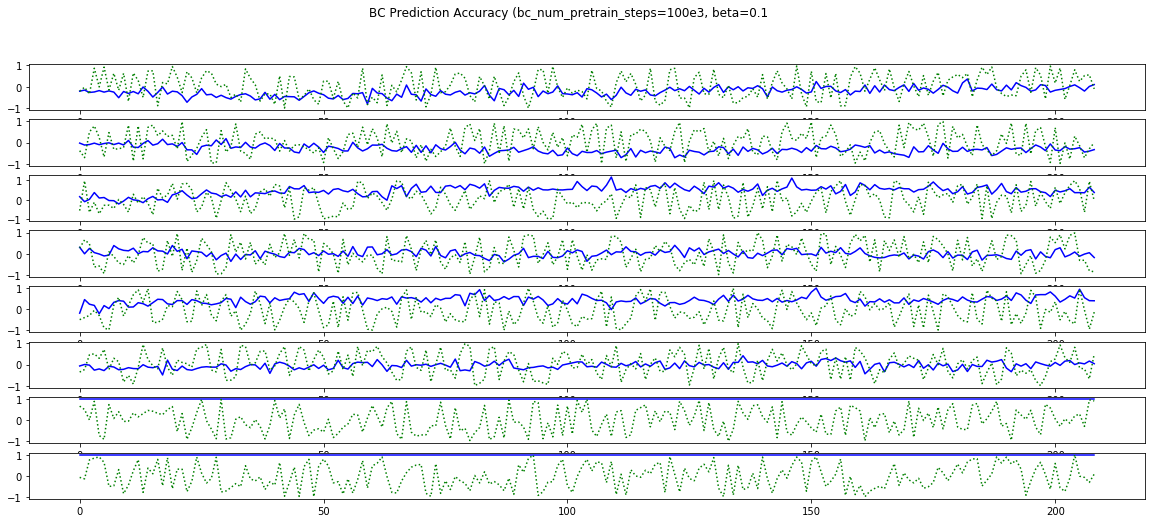

In [5]:
fig, ax = plt.subplots(actions[0].shape[1], figsize=(20,8))
fig.suptitle('BC Prediction Accuracy (bc_num_pretrain_steps=100e3, beta=0.1')
for i in range(actions[0].shape[1]):
	ax[i].plot(actions[0][:, i], color='b')
	ax[i].plot(random_pred[0][:, i], color='g', linestyle=':')
plt.savefig('pred_acc_bc_num_pretrain_steps_100k_a_0p1.png')